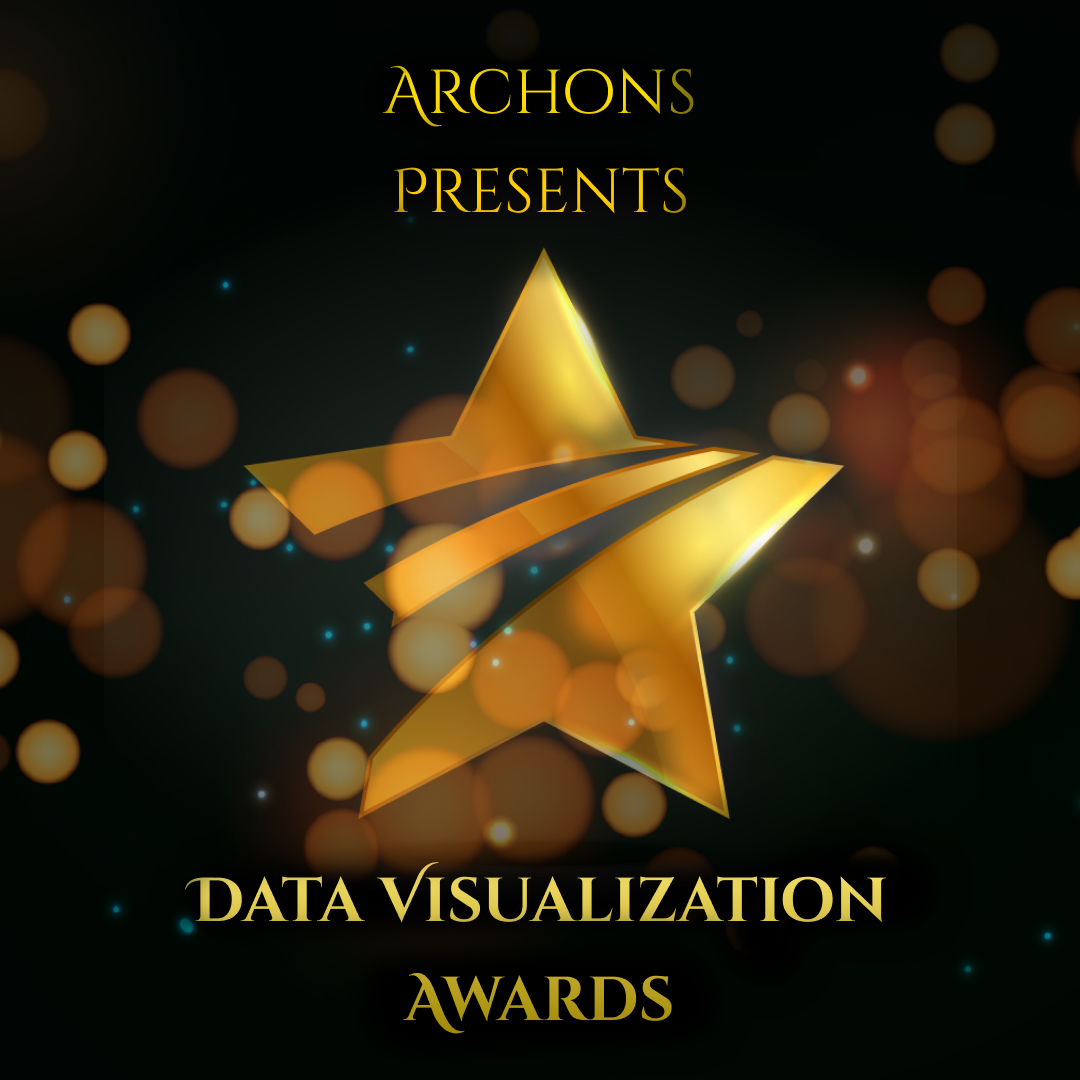

In [198]:
from IPython.display import Image
Image(filename='main.png',width = 500, height = 300)

# **Welcome to Data Visualization Awards 2020!**
---
We give AWARDS based on data. Not FAMILY ROOTS.

*Say no to nepotism*!

In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [200]:
final_data= pd.read_csv('datav3.csv')

# Let's first look into our dataset

**How did we collect it?**: We used *BeautifulSoup* library to scrap webpages such as Wikipedia and IMDB to get our data!

In [241]:
final_data

,year,title,director,cast,genre,producer,link,music,cast_size,imdb
0,2020,Anantha Veedu,Sugumaran,"Sugumaran, Shivayam, Nagarajan",NaN,Nila Movie Makers,NaN,NaN,3,NaN
1,2020,Ayya Ullen Ayya,Erode Soundar,"Kabilesh, Prarthana Sandeep, Livingston, Manobala",NaN,Veera Sri Santhana Karuparayan,NaN,NaN,4,7.9
2,2020,En Sangathu Aala Adichavan Evanada,Naveen Manikandan,"Vikkas, Madhumitha, Ramar, Udayabhanu",NaN,SH Media Dreams,NaN,NaN,4,NaN
3,2020,Kadhal Vizhigal,Sri Sumathy,"Jayabalan, Sri Sumathy",NaN,Sri Sumathy,NaN,NaN,2,NaN
4,2020,Pachai Vilakku,Maran,"Maran, Theesha, Imman Annachi, Manobala",NaN,Digithink Mediawork,/wiki/Pachai_Vilakku_(2020_film),NaN,4,NaN
5,2020,Pizhai,Rajavel Krishnaa,"Kakka Muttai Ramesh, Appa Nasath, Mime Gopi, C...",NaN,Turning Point Productions,/wiki/Pizhai,FS Faizal,4,6.5
6,2020,Thedu,Suci Easwar,"Sanjay, Meghana, Sivakasi Murgesan, Kamaraj",NaN,Kishore Cine Arts,/wiki/Thedu,DJ Gopinath,4,NaN
7,2020,Thottu Vidum Thooram,V. P. Nageswaran,"Vivek Raj, Monica Chinnakotla, Livingston, Seetha",NaN,Usha Cine Creations,NaN,NaN,4,NaN
8,2020,Darbar,AR Murugadoss,"Rajinikanth, Nayanthara, Nivetha Thomas, Sunie...",NaN,Lyca Productions,/wiki/Darbar_(film),NaN,4,6.2
9,2020,Pattas,R. S. Durai Senthilkumar,"Dhanush, Sneha, Mehreen Pirzada, Naveen Chandra",NaN,Sathya Jyothi Films,/wiki/Pattas,"Vivek,Mervin",4,5.8


# How much data did we collect?

In [202]:
final_data.shape

(1708, 12)

In [203]:
final_data=final_data.replace('',np.nan)
final_data=final_data.replace(' ',np.nan)
final_data=final_data.drop('Unnamed: 0',axis=1)
final_data=final_data.drop('Unnamed: 0.1',axis=1)

In [204]:
genres=final_data['genre'].unique()[1:]
len(genres)

139

In [205]:
n = 6
final_data['genre'].value_counts()[:n].index.tolist()[1:]

['Romance', 'Comedy', 'Action', 'Thriller', 'Romantic comedy']

In [206]:
directors_nan=final_data['director'].unique()
directors=[dir for dir in directors_nan if dir is not np.nan]
len(directors)

1278

In [207]:
music_nan=final_data['music'].unique()
music=[dir for dir in music_nan if dir is not np.nan]
len(music)

411

In [208]:
year_wise_avg_rating={'t':''}
years_time=[]
yearly_movie_count=[]
for yr in range(2020,2009,-1):
    subset=final_data.loc[final_data['year']==yr]
    years_time.append(yr)
    yearly_movie_count.append(len(subset))
    print(str(subset['imdb'].mean())+' | '+str(yr))
    year_wise_avg_rating[yr]=subset['imdb'].mean()
del year_wise_avg_rating['t']

5.482608695652174 | 2020
5.739072847682122 | 2019
nan | 2018
5.897959183673471 | 2017
5.820270270270268 | 2016
5.818656716417908 | 2015
6.191160220994473 | 2014
6.000980392156865 | 2013
6.056382978723404 | 2012
5.902105263157894 | 2011
5.768478260869569 | 2010


In [209]:
final_data['music'].describe()

count          903
unique         411
top       D. Imman
freq            42
Name: music, dtype: object

# TOP 5 ACTORS (Based on Filmography) of the decade

In [210]:
actors=[]
for row in final_data['cast']:
    cast_row=str(row).strip().split(',')
    actors.extend(cast_row)
actors=[a.strip() for a in actors]    

In [211]:
actor_df=pd.DataFrame({'Actors': list(actors)})

In [212]:
n = 6
actor_df['Actors'].value_counts()[:n].index.tolist()[1:]

['Santhanam', 'Vijay Sethupathi', 'Yogi Babu', 'Kishore', 'Prakash Raj']

['Santhanam', 'Vijay Sethupathi', 'Yogi Babu', 'Kishore', 'Prakash Raj']

# Top 5 actors of the year (Based on Filmography) 

In [213]:
for yr in range(2019,2009,-1):
    subset=final_data.loc[final_data['year']==yr]
    actors=[]
    for row in subset['cast']:
        cast_row=str(row).strip().split(',')
        actors.extend(cast_row)
    actors=[a.strip() for a in actors]
    actor_df=pd.DataFrame({'Actors': list(actors)})
    res=actor_df['Actors'].value_counts()[:6].index.tolist()
    if len(res)>0:
        print("YEAR "+str(yr)+" "+str(res))
    

YEAR 2019 ['Yogi Babu', 'Oviya', 'G. V. Prakash Kumar', 'Nayanthara', 'Karunakaran', 'Kishore']
YEAR 2017 ['Soori', 'Daniel Balaji', 'Ganja Karuppu', 'Gautham Karthik', 'Bala Saravanan', 'Powerstar Srinivasan']
YEAR 2016 ['Samuthirakani', 'Bobby Simha', 'Aishwarya Rajesh', 'Srushti Dange', 'Vijay Sethupathi', 'Karunas']
YEAR 2015 ['Nayantara', 'Samuthirakani', 'Arya', 'Santhanam', 'Jayam Ravi', 'Vijay Sethupathi']
YEAR 2014 ['Santhanam', 'Vimal', 'Vidharth', 'Vivek', 'Lakshmi Menon', 'Vaibhav']
YEAR 2013 ['Santhanam', 'nan', 'Vimal', 'Prakash Raj', 'Arya', 'Iniya']
YEAR 2012 ['Santhanam', 'Thambi Ramaiah', 'Sunaina', 'Vijay Sethupathi', 'Vimal', 'Amala Paul']
YEAR 2011 ['nan', 'Anjali', 'Nakshatra', 'Nassar', 'Jai Akash', 'Vikram']
YEAR 2010 ['Prakash Raj', 'Sathyaraj', 'Harish', 'Tamannaah Bhatia', 'Ramana', 'Santhanam']


# A peek into the ultimate battle: Ajith vs Vijay
Let's see how both are performing in the past decade...

In [214]:
vijay_df=pd.DataFrame(columns=final_data.columns)
ajith_df=pd.DataFrame(columns=final_data.columns)
for index,row in final_data.iterrows():
    if 'Vijay' in str(row['cast']).split(','):
        vijay_df.loc[len(vijay_df.index)+1]=row
#         print(type(row))
    if 'Ajith Kumar' in str(row['cast']).split(','):
        ajith_df.loc[len(ajith_df.index)+1]=row

    

In [215]:
vijay_df.reset_index(inplace=True)
vijay_df

,index,year,title,director,cast,genre,producer,link,music,cast_size,imdb
0,1,2019,Bigil,Atlee,"Vijay, Nayanthara, Jackie Shroff",NaN,AGS Entertainment,/wiki/Bigil,"A. R. Rahman,A. R. Rahman,Qutub,Kripa",3,6.8
1,2,2017,Bairavaa,Bharathan,"Vijay, Keerthy Suresh, Sathish, Jagapati Babu,...",Action masala,Vijaya Productions,/wiki/Bairavaa,Santhosh Narayanan,5,5.9
2,3,2017,Mersal,Atlee,"Vijay, Samantha, Kajal Aggarwal, Nithya Menen,...",Action Thriller,Sri Thenandal Films,/wiki/Mersal_(film),NaN,5,7.6
3,4,2016,Theri,Atlee,"Vijay, Samantha, Amy Jackson",Action masala,V Creations,/wiki/Theri_(film),NaN,3,7.1
4,5,2015,Puli,Chimbu Deven,"Vijay, Prabhu, Sudeep, Sridevi, Shruti Haasan,...",Fantasy Horror,SKT Studios,/wiki/Puli_(2015_film),NaN,6,4.4
5,6,2014,Kaththi,AR Murugadoss,"Vijay, Samantha, Neil Nitin Mukesh",Action thriller,Lyca Productions,/wiki/Kaththi,Anirudh Ravichander,3,7.9
6,7,2013,Thalaivaa,A. L. Vijay,"Vijay, Sathyaraj, Amala Paul, Santhanam, Abhim...",Action thriller,NaN,/wiki/Thalaivaa,G. V. Prakash Kumar,6,6.1
7,8,2012,Nanban,Shankar,"Vijay, Jiiva, Srikanth, Ileana D'Cruz",Comedy-drama,NaN,/wiki/Nanban_(2012_film),NaN,4,7.4
8,9,2012,Thuppakki,A. R. Murugadoss,"Vijay, Kajal Aggarwal, Vidyut Jamwal, Jayaram",Action,NaN,/wiki/Thuppakki,Harris Jayaraj,4,7.9
9,10,2010,Sura,S. P. Rajkumar,"Vijay, Tamannaah Bhatia, Dev Gill",NaN,Murugan Cine Arts,/wiki/Sura_(film),NaN,3,2.5


In [216]:
ajith_df.drop(7,inplace=True)
ajith_df=ajith_df.reset_index()

In [217]:
ajith_df

,index,year,title,director,cast,genre,producer,link,music,cast_size,imdb
0,1,2019,Viswasam,Siva,"Ajith Kumar, Nayanthara, Jagapathi Babu",NaN,Sathya Jyothi Films,/wiki/Viswasam,D. Imman,3,6.7
1,2,2019,Nerkonda Paarvai,H. Vinoth,"Ajith Kumar, Shraddha Srinath, Rangaraj Pandey",NaN,Zee Studios,/wiki/Nerkonda_Paarvai,Yuvan Shankar Raja,3,8.2
2,3,2017,Vivegam,Siva,"Ajith Kumar, Kajal Aggarwal, Vivek Oberoi, Aks...",Spy Thriller,Sathya Jyothi Films,/wiki/Vivegam,Anirudh Ravichander,4,5.6
3,4,2015,Yennai Arindhaal,Gautham Menon,"Ajith Kumar, Arun Vijay, Trisha Krishnan, Anus...",Action drama,Sri Sai Ram Creations,/wiki/Yennai_Arindhaal,Harris Jayaraj,4,7.3
4,5,2015,Vedalam,Siva,"Ajith Kumar, Shruti Haasan, Lakshmi Menon",Action masala,Shri Sai Raam Creations,/wiki/Vedalam,Anirudh Ravichander,3,6.2
5,6,2014,Veeram,Siva,"Ajith Kumar, Tamannaah, Vidharth, Bala, Pradee...",Action-masala,Vijaya Productions,/wiki/Veeram_(2014_film),NaN,5,6.5
6,8,2013,Arrambam,Vishnuvardhan,"Ajith Kumar, Arya, Nayantara, Taapsee Pannu",Action thriller,NaN,/wiki/Arrambam,Yuvan Shankar Raja,4,7.0
7,9,2012,Billa II,Chakri Toleti,"Ajith Kumar, Parvathy Omanakuttan, Bruna Abdul...",Gangster-thriller,NaN,/wiki/Billa_II,Yuvan Shankar Raja,5,6.2
8,10,2011,Mankatha,Venkat Prabhu,"Ajith Kumar, Arjun, Trisha, Lakshmi Rai, Andre...","Action, Thriller",NaN,/wiki/Mankatha,Yuvan Shankar Raja,7,7.6
9,11,2010,Aasal,Saran,"Ajith Kumar, Sameera Reddy, Bhavana",NaN,Sivaji Productions,/wiki/Aasal,Bharathwaj,3,3.9


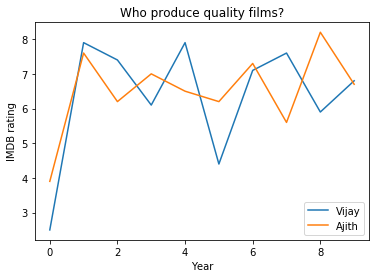

In [218]:
#X is year
#Y is rating
#x=range(2020,2009,-1)
y_vijay=vijay_df['imdb'].tolist()[::-1]
y_ajith=ajith_df['imdb'].tolist()[::-1]
#y_ajith=y_ajith.reverse()
# print(y_ajith)
plt.plot(y_vijay,label="Vijay")
plt.plot(y_ajith,label="Ajith")
plt.xlabel('Year')
plt.ylabel('IMDB rating')
plt.title('Who produce quality films?')
plt.legend()
plt.show()

# What the audience love?
Let's analyse the data and see which movie type people love the most from kollywood!

In [219]:
genre_main=['romance', 'comedy', 'action', 'thriller']
romance_df=pd.DataFrame(columns=final_data.columns)
comedy_df=pd.DataFrame(columns=final_data.columns)
action_df=pd.DataFrame(columns=final_data.columns)
thriller_df=pd.DataFrame(columns=final_data.columns)
others_df=pd.DataFrame(columns=final_data.columns)
horror_df=pd.DataFrame(columns=final_data.columns)

for index,row in final_data.iterrows():
    genre=str(row['genre']).replace('-',',')
    genre=genre.replace(';',',')
    genre=genre.replace(' ',',')
    genre_list=[a.strip().lower() for a in genre.split(',')] 
#     print(genre_list)
    occuped=False
    if 'romance' in genre_list:
        occuped=True
        romance_df.loc[len(romance_df.index)+1]=row
    if 'comedy' in genre_list or 'humour' in genre_list or 'humor' in genre_list :
        occuped=True
        comedy_df.loc[len(comedy_df.index)+1]=row
    if 'action' in genre_list :
        occuped=True
        action_df.loc[len(action_df.index)+1]=row
    if 'thriller' in genre_list:
        occuped=True
        thriller_df.loc[len(thriller_df.index)+1]=row
    if 'horror' in genre_list:
        occuped=True
        horror_df.loc[len(horror_df.index)+1]=row
    if occuped:
        others_df.loc[len(others_df.index)+1]=row


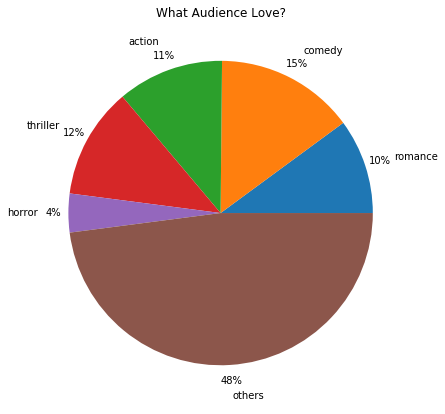

In [220]:
genre_data_audience=[len(romance_df),len(comedy_df),len(action_df),len(thriller_df),len(horror_df),len(others_df)]
genre_main=['romance', 'comedy', 'action', 'thriller','horror','others']
plt.figure(figsize =(10, 7)) 
plt.pie(genre_data_audience, labels = genre_main,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2) 
plt.title("What Audience Love?") 
plt.show()

***It was good, but let us remove the other genre movies so that we can focus on the following genres:***

--- 

1. Horror
2. Thriller
3. Action
4. Comedy
5. Romance

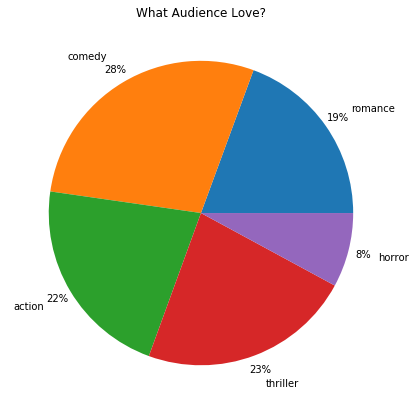

In [221]:
genre_data_audience=[len(romance_df),len(comedy_df),len(action_df),len(thriller_df),len(horror_df)]
genre_main=['romance', 'comedy', 'action', 'thriller','horror']
plt.figure(figsize =(10, 7)) 
plt.pie(genre_data_audience, labels = genre_main,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2) 
plt.title("What Audience Love?") 
plt.show()

# Let us now visualize how the shares of each genre change over time!

---



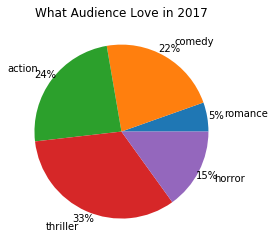

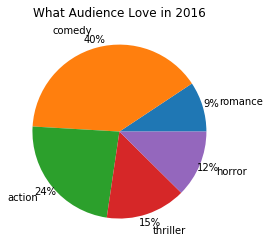

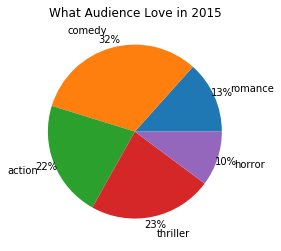

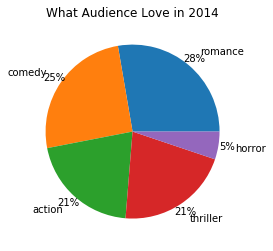

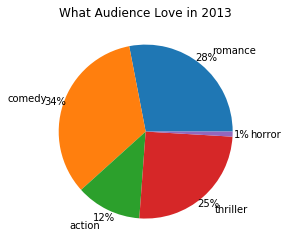

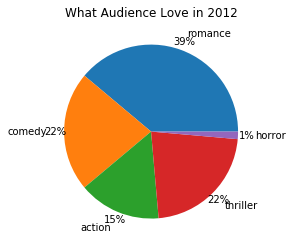

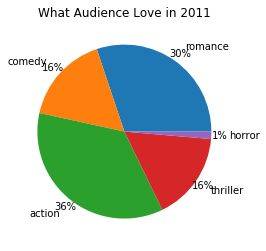

In [243]:
for yr in range(2017,2010,-1):
    subset=final_data.loc[final_data['year']==yr]
    genre_main=['romance', 'comedy', 'action', 'thriller']
    
    
    romance_df=pd.DataFrame(columns=final_data.columns)
    comedy_df=pd.DataFrame(columns=final_data.columns)
    action_df=pd.DataFrame(columns=final_data.columns)
    thriller_df=pd.DataFrame(columns=final_data.columns)
    others_df=pd.DataFrame(columns=final_data.columns)
    horror_df=pd.DataFrame(columns=final_data.columns)

    for index,row in subset.iterrows():
        genre=str(row['genre']).replace('-',',')
        genre=genre.replace(';',',')
        genre=genre.replace(' ',',')
        genre_list=[a.strip().lower() for a in genre.split(',')] 
    #     print(genre_list)
        occuped=False
        if 'romance' in genre_list:
            occuped=True
            romance_df.loc[len(romance_df.index)+1]=row
        if 'comedy' in genre_list or 'humour' in genre_list or 'humor' in genre_list :
            occuped=True
            comedy_df.loc[len(comedy_df.index)+1]=row
        if 'action' in genre_list :
            occuped=True
            action_df.loc[len(action_df.index)+1]=row
        if 'thriller' in genre_list:
            occuped=True
            thriller_df.loc[len(thriller_df.index)+1]=row
        if 'horror' in genre_list:
            occuped=True
            horror_df.loc[len(horror_df.index)+1]=row
        if occuped:
            others_df.loc[len(others_df.index)+1]=row
    genre_data_audience=[len(romance_df),len(comedy_df),len(action_df),len(thriller_df),len(horror_df)]
    genre_main=['romance', 'comedy', 'action', 'thriller','horror']
    plt.figure(figsize =(4, 4)) 
    plt.pie(genre_data_audience, labels = genre_main,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2) 
    plt.title("What Audience Love in "+str(yr)) 
    plt.show()

# IS Vijay Sethupathi the new director favourite?

---

Recently, Vijay Sethupathi got a lot of movie opportunities these days. Let's see what the data says about it


In [223]:
vijayset_df=pd.DataFrame(columns=['year','title','imdb'])

In [224]:
for yr in range(2020,2009,-1):
    subset=final_data.loc[final_data['year']==yr]
    for index,row in subset.iterrows():
         if 'Vijay Sethupathi' in str(row['cast']).split(','):
            vijayset_df.loc[len(vijayset_df.index)+1]=row
   

In [225]:
vijayset_df

,year,title,imdb
1,2019,Super Deluxe,8.4
2,2019,Sindhubaadh,5.1
3,2019,Sangathamizhan,3.4
4,2017,Kavan,7.1
5,2017,Puriyaadha Pudhir,6.6
6,2017,Karuppan,5.6
7,2016,Sethupathi,7.2
8,2016,Kadhalum Kadandhu Pogum,7.3
9,2016,Iraivi,8.0
10,2016,Dharma Durai,7.5


[3, 0, 3, 6, 3, 5, 2, 2, 0, 1]
[2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]


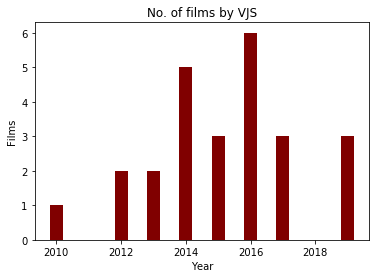

In [244]:
data=[]
yrs= [a for a in range(2019,2009,-1)]
for yr in range(2019,2009,-1):
    subset=vijayset_df.loc[vijayset_df['year']==yr]
    data.append(len(subset))
print(data)
print(yrs)
plt.bar(yrs, data, color ='maroon',  
        width = 0.4)
plt.xlabel("Year") 
plt.ylabel("Films") 
plt.title("No. of films by VJS") 
plt.show() 

OK, let us see about his performance in recent movies

No handles with labels found to put in legend.


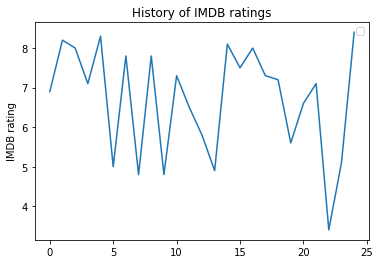

In [227]:
y_vijays=vijayset_df['imdb'].tolist()[::-1]

plt.plot(y_vijays)
plt.ylabel('IMDB rating')
plt.title('History of IMDB ratings')
plt.legend()
plt.show()

# Who is the best director?

---

Let us compare the three directors who are famous among teenagers.
1. AR Murgadoss
2. Siva
3. Atlee

In [228]:
murug_df=pd.DataFrame(columns=final_data.columns)
siva_df=pd.DataFrame(columns=final_data.columns)
atlee_df=pd.DataFrame(columns=final_data.columns)

In [229]:
for index,row in final_data.iterrows():
#     print(str(row['director']).lower().find('murugadoss'))
    if str(row['director']).lower().find('murugadoss')>=0:
        murug_df.loc[len(murug_df.index)+1]=row
    if str(row['director']).lower() == str('siva'):
        siva_df.loc[len(siva_df.index)+1]=row
    if str(row['director']).lower().find('atlee')>=0:
        atlee_df.loc[len(atlee_df.index)+1]=row
#         print('yy')
    


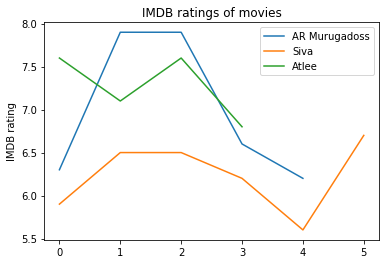

In [230]:
y_murug=murug_df['imdb'].tolist()[::-1]
y_siva=siva_df['imdb'].tolist()[::-1]
y_atlee=atlee_df['imdb'].tolist()[::-1]
#y_ajith=y_ajith.reverse()
# print(y_ajith)
plt.plot(y_murug,label="AR Murugadoss")
plt.plot(y_siva,label="Siva")
plt.plot(y_atlee,label="Atlee")
plt.ylabel('IMDB rating')
plt.title('IMDB ratings of movies')
plt.legend()
plt.show()

# Does nepotism exist in kollywood?

---

Let us discuss the important problem that's being talked about in almost every film industry - **NEPOTISM**
Let us consider 2 artists - **Shruti Hassan** is a star kid. While **Anjali** is not a star kid. Both entered into prominent film space at the same time.

In [231]:
hassan_df=pd.DataFrame(columns=final_data.columns)
anja_df=pd.DataFrame(columns=final_data.columns)
for index,row in final_data.iterrows():
    cast=str(row['cast']).split(',')
    cast=[a.strip() for a in cast]
    if 'Shruti Haasan' in cast:
        hassan_df.loc[len(hassan_df.index)+1]=row
#         print(type(row))
    if 'Anjali' in cast:
        anja_df.loc[len(anja_df.index)+1]=row

    


In [232]:
hassan_df

,year,title,director,cast,genre,producer,link,music,cast_size,imdb
1,2017,Si3,Hari,"Suriya, Shruti Haasan, Anushka Shetty, Thakur ...",Action masala,Studio Green,/wiki/Si3_(film),NaN,4,6.2
2,2015,Puli,Chimbu Deven,"Vijay, Prabhu, Sudeep, Sridevi, Shruti Haasan,...",Fantasy Horror,SKT Studios,/wiki/Puli_(2015_film),NaN,6,4.4
3,2015,Vedalam,Siva,"Ajith Kumar, Shruti Haasan, Lakshmi Menon",Action masala,Shri Sai Raam Creations,/wiki/Vedalam,Anirudh Ravichander,3,6.2
4,2014,Poojai,Hari,"Vishal, Shruti Haasan, Sathyaraj",Action-masala,"Vendhar Movies,Vishal Film Factory",/wiki/Poojai,Yuvan Shankar Raja,3,5.0
5,2012,3,Aishwarya R. Dhanush,"Dhanush, Shruti Haasan",Romantic drama,NaN,/wiki/3_(2012_Indian_film),NaN,2,7.2
6,2011,7aam Arivu,A. R. Murugadoss,"Suriya, Shruti Haasan, Johnny Tri Nguyen, Avinash",Science fiction,NaN,/wiki/7aam_Arivu,Harris Jayaraj,4,6.3


In [233]:
anja_df

,year,title,director,cast,genre,producer,link,music,cast_size,imdb
1,2020,Naadodigal 2,Samuthirakani,"Sasikumar, Anjali, Athulya Ravi",NaN,Madras Enterprises,/wiki/Naadodigal_2,Justin Prabhakaran,3,5.0
2,2019,Peranbu,Ram,"Mammootty, Anjali, Sadhana",NaN,Shree Rajalakshmi Films,/wiki/Peranbu,Yuvan Shankar Raja,3,9.0
3,2019,Lisaa,Raju Vishwanath,"Anjali, Sam Jones, Makarand Deshpande, Yogi Babu",NaN,PG Media Works,/wiki/Lisaa,Santhosh Dhayanidhi,4,3.3
4,2019,Sindhubaadh,S. U. Arun Kumar,"Vijay Sethupathi, Anjali, Linga",NaN,"Vansan Movies, K Productions",/wiki/Sindhubaadh,Yuvan Shankar Raja,3,5.1
5,2017,Taramani,Ram,"Vasanth Ravi, Andrea Jeremiah, Anjali",Romantic drama,Catamaran Productions,/wiki/Taramani_(film),NaN,3,7.5
6,2017,Balloon,Sinish,"Jai, Anjali, Janani Iyer",Horror,70mm Entertainment & Farmer's Master Plan Prod...,/wiki/Balloon_(2017_film),NaN,3,4.6
7,2016,Mapla Singam,N. Rajasekhar,"Vimal, Anjali, Soori",Comedy,Escape Artists Motion Pictures,/wiki/Mapla_Singam,N. R. Raghunanthan,3,5.0
8,2016,Iraivi,Karthik Subbaraj,"Vijay Sethupathi, S. J. Surya, Bobby Simha, An...",Drama,Thirukumaran Entertainment,/wiki/Iraivi,Santhosh Narayanan,6,8.0
9,2015,Sakalakala Vallavan,Suraj,"Jayam Ravi, Trisha, Anjali, Soori",Masala,Lakshmi Movie Makers,/wiki/Sakalakala_Vallavan_(2015_film),Ilaiyaraaja,4,3.0
10,2013,Vatthikuchi,H.nowfal riswan,"Dhileban, Anjali, Jayaprakash, Sampath Raj",Thriller,NaN,/wiki/Vatthikuchi,Ghibran,4,6.3


# An Insight into cast size

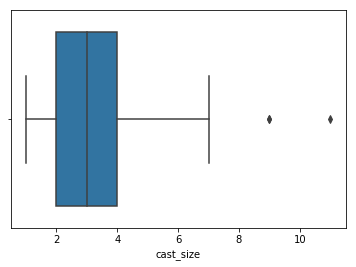

In [234]:

sns.boxplot(x=final_data["cast_size"])


In [235]:
final_data.describe()['cast_size']

count    1708.000000
mean        3.136417
std         1.107363
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        11.000000
Name: cast_size, dtype: float64

From the about output, we can see that about **75%** of movies have a cast size below or equal to 4.

*So, if you're planning to make a movie with all your 20 friends, be aware that producers aren't too pleased with a big cast size*

# Time series to predict how many films will be release this year (2020)*
*Provided corona did'nt hit us.

In [236]:
yearly_movie_count[2]=36 +44 +52+ 48
yearly_movie_count
years_time

[2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]

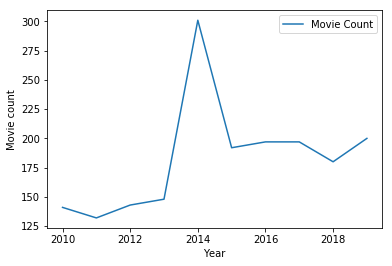

In [237]:
y=yearly_movie_count[1:]
x=years_time[1:]
# print(y_ajith)
plt.plot(x,y,label="Movie Count")
plt.ylabel('Movie count')
plt.xlabel('Year')
plt.legend()
plt.show()

In [238]:
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(y[::-1])           # set to stepwise 
  
# To print the summary 
# stepwise_fit.summary() 

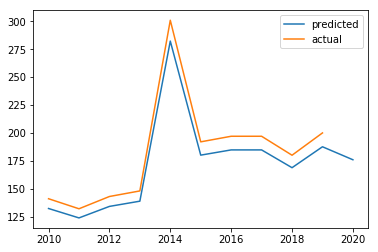

In [239]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(y[::-1],  
                order = (1, 0, 0))

result = model.fit() 
predictions = result.predict(1, len(y)+1)
# plot predictions and actual values 
plt.plot([2020,2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010][::-1],predictions,label="predicted")
plt.plot(x[::-1],y[::-1],label="actual")

plt.legend()

In [240]:
round(predictions[len(predictions)-1])

176.0